In [1]:
using Flux
using MLDatasets, DataFrames
using Flux: logitcrossentropy, normalise, onehotbatch
using Statistics: mean, std

In [3]:
iris_data = Iris()

dataset Iris:
  metadata   =>    Dict{String, Any} with 4 entries
  features   =>    150×4 DataFrame
  targets    =>    150×1 DataFrame
  dataframe  =>    150×5 DataFrame

In [9]:
features = Matrix(iris_data.features[:,3:4])
labels = Matrix(iris_data.targets);

In [10]:
normed_features = normalise(features, dims=1)';

In [11]:
classes = sort(unique(labels))
onehot_labels = onehotbatch(labels, classes)

3×150×1 OneHotArray(::Matrix{UInt32}) with eltype Bool:
[:, :, 1] =
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1

In [6]:
train_data = Iterators.repeated((normed_features, onehot_labels), 110)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{LinearAlgebra.Adjoint{Float64, Matrix{Float64}}, Flux.OneHotArray{UInt32, 3, 2, 3, Matrix{UInt32}}}}}(Base.Iterators.Repeated{Tuple{LinearAlgebra.Adjoint{Float64, Matrix{Float64}}, Flux.OneHotArray{UInt32, 3, 2, 3, Matrix{UInt32}}}}(([-1.3412647775632507 -1.3412647775632507 … 0.9333504472472365 0.7627543053864495; -1.3129594653921026 -1.3129594653921026 … 1.4479366066940933 0.790580399054523], [1 1 … 0 0; 0 0 … 0 0; 0 0 … 1 1;;;])), 110)

In [7]:
model = Chain(Dense(2, 3))

Chain(
  Dense(2 => 3),                        # 9 parameters
) 

In [8]:
loss(x, y) = logitcrossentropy(model(x), y)

loss (generic function with 1 method)

In [9]:
optimiser = Descent(0.5)

Descent(0.5)

In [26]:
Flux.train!(loss, Flux.params(model), train_data, optimiser)

In [11]:
μ = mean.( [ features[:,1], features[:,2] ] )
sig = std.( [ features[:,1], features[:,2] ] ) 

2-element Vector{Float64}:
 1.7644204199522626
 0.7631607417008412

In [12]:
function iris_class(x::Array{Float64,1})
    z  = (x .- μ)./sig
    return argmax( softmax( model( z ) ) )
end

iris_class (generic function with 1 method)

In [13]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [53]:
setosa_ind =  Matrix(iris_data.targets .== "Iris-setosa")[:,1]
versicolor_ind =  Matrix(iris_data.targets .== "Iris-versicolor")[:,1]
virginica_ind =  Matrix(iris_data.targets .== "Iris-virginica")[:,1];

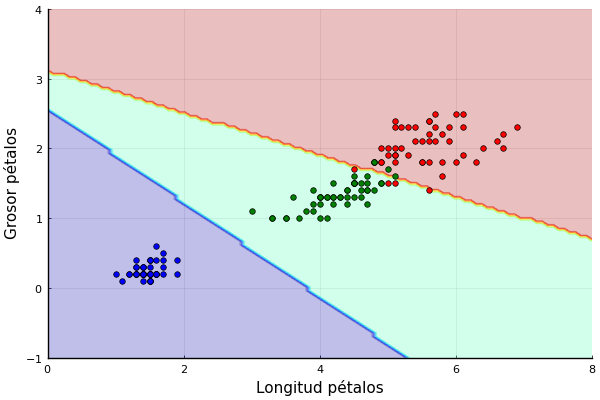

In [86]:
contourf( LinRange(0.0,8.0,100), LinRange(-1.0,4.0,100),
    (x,y)-> iris_class([x,y]), fill=true, levels=10, xlim=(0,8), ylim=(-1,4), c=:jet, alpha=0.25, legend = :none )
scatter!( Array(iris_data.features[:,3])[ virginica_ind ], Array(iris_data.features[:,4])[ virginica_ind ], label="", markerstrokewidth=0.5, c=:red )
scatter!( Array(iris_data.features[:,3])[ setosa_ind ], Array(iris_data.features[:,4])[ setosa_ind ], label="", markerstrokewidth=0.5, c=:blue )
scatter!( Array(iris_data.features[:,3])[ versicolor_ind ], Array(iris_data.features[:,4])[ versicolor_ind ], label="", markerstrokewidth=0.5, c=:green )
xlabel!("Longitud pétalos")
ylabel!("Grosor pétalos")

In [70]:
iris_data.features

,sepallength,sepalwidth,petallength,petalwidth
,Float64,Float64,Float64,Float64
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2
